<a href="https://colab.research.google.com/github/Biswajeet1995/Book-recommendation-system/blob/main/book_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

# **Dataset information**

The Book-Crossing dataset comprises 3 files.

● Users :
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

● Books :
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

● Ratings :
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

# Let's import libraries

In [76]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# To supress the warning messages

import warnings
warnings.filterwarnings('ignore')

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading users Data

In [78]:
# Let's load Users data and create dataframe

users = pd.read_csv('/content/drive/MyDrive/Book Recommendation system/Users.csv')

In [79]:
# Printing first five rows of users dataframe

users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [80]:
#Printing last five rows of users dataframe

users.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


### Loading Books data.

In [81]:
# Let's load books data and create dataframe

books = pd.read_csv('/content/drive/MyDrive/Book Recommendation system/Books.csv')

In [82]:
# Printing first five rows of books dataframe

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [83]:
#Printing last five rows of books dataframe

users.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


### inserting Ratings data.

In [84]:
# Ratings data

ratings = pd.read_csv('/content/drive/MyDrive/Book Recommendation system/Ratings.csv')

In [85]:
# Printing first five rows of ratings dataframe

ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [86]:
# Printing last five rows of ratings dataframe

ratings.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


shape of 3 dataset

In [87]:
# Dataset dimension
print(f'''\t  Book_df shape is {books.shape}
          Ratings_df shape is {ratings.shape}
          Users_df shape is {users.shape}''')

	  Book_df shape is (271360, 8)
          Ratings_df shape is (1149780, 3)
          Users_df shape is (278858, 3)


# Users Dataset(EDA)

Let's find the %age of null values in users dataset

In [88]:
#defining function to find %age of null values

def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [89]:
#%age of null values in users dataset

missing_values(users)

,index,Missing Values,% of Total Values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


Age column has around 39% null values

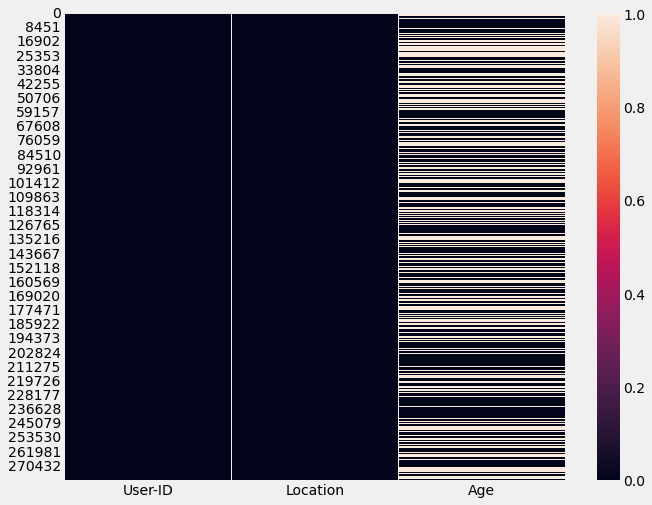

In [90]:
#plotting heat map of null values

fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(users.isna())
plt.show()

### **Let's check the distribution of Age column.**

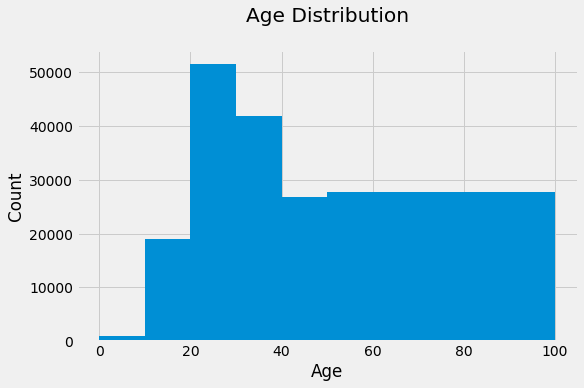

In [91]:
# Histplot showing distribution of age

plt.figure(figsize=(8,5))
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Boxplot of Age column')

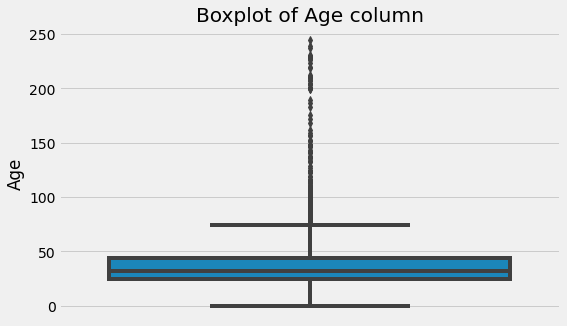

In [92]:
# Plotting boxplot for age column for checking the outliers

plt.figure(figsize=(8,5))
sns.boxplot(y='Age', data=users)
plt.title('Boxplot of Age column')

Age : 244

there,we have Outlier data in Age

In [93]:
# Descriptive stats of Age column

users.Age.describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

In [94]:
#printing unique age values

print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Text(0.5, 1.0, 'Age Distribution Plot')

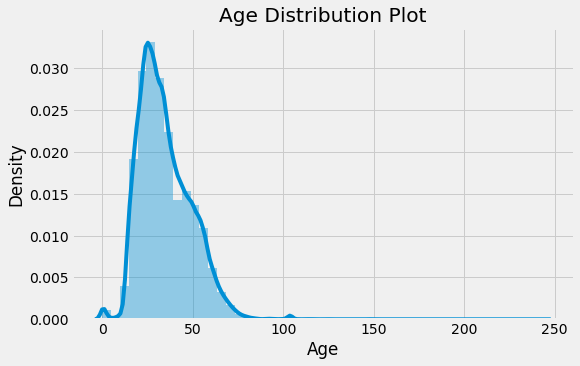

In [95]:
# Displot of Age column

plt.figure(figsize=(8,5))
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

* From boxplot as well as descriptive stats, it is clear that maximum value of age is 244.
* So, there are outliers in Age column.

In [96]:
# Replacing outlier data with NaN

users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [97]:
# Replacing Nan values with mean

users.Age = users.Age.fillna(users.Age.mean())

In [98]:
# Let's see total no of null values again

users.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

Let's find unique value in Location column

In [99]:
# Printing unique values of location column

users['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

*   Location column contains some special characters.
*   Let's clean this column and also create a new column 'Country'.

In [100]:
# Creating column Country

for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [101]:
# dropping location column

users.drop('Location',axis=1,inplace=True)

In [102]:
# Converting location column into string datatype

users['Country']=users['Country'].astype('str')

In [103]:
# Extracting elements of Country column

a=list(users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [104]:
# Replacing incorrect words with correct one

users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'])

0                    usa
1                    usa
2                 russia
3               portugal
4         united kingdom
               ...      
278853               usa
278854    united kingdom
278855            canada
278856               usa
278857           ireland
Name: Country, Length: 278858, dtype: object

Text(0.5, 1.0, 'Count of users Country wise')

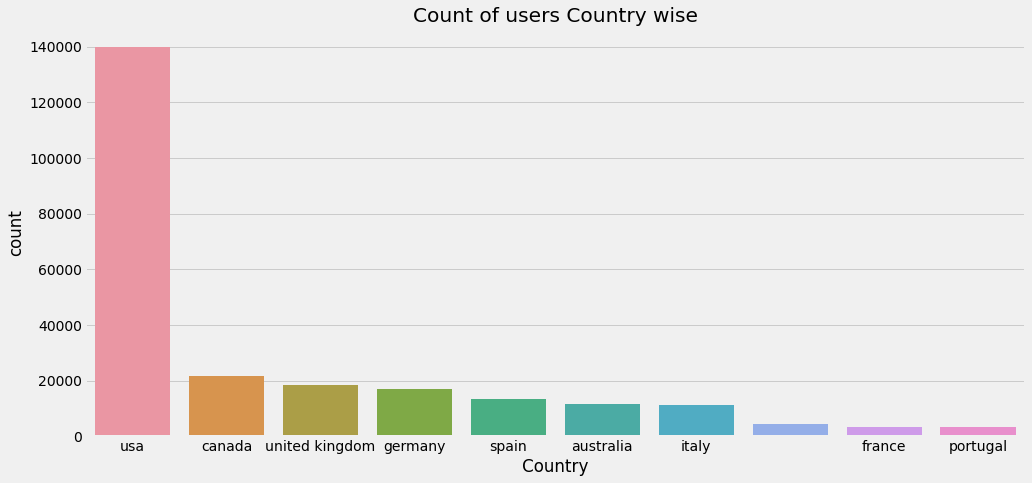

In [105]:
# Barplot to show count of users as per country

plt.figure(figsize=(15,7))
sns.countplot(x='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

In [106]:
#let's have a look at users dataset again

users.head()

,User-ID,Age,Country
0,1,34.746638,usa
1,2,18.000000,usa
2,3,34.746638,russia
3,4,17.000000,portugal
4,5,34.746638,united kingdom


In [107]:
#Let's see datatypes of column

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  278858 non-null  int64  
 1   Age      278858 non-null  float64
 2   Country  278858 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


# Books Dataset(EDA)

In [108]:
# Checking the head of books dataset.

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Lets check top 10 author who had written the maximum number of books

Text(0.5, 1.0, 'Top 10 Authors')

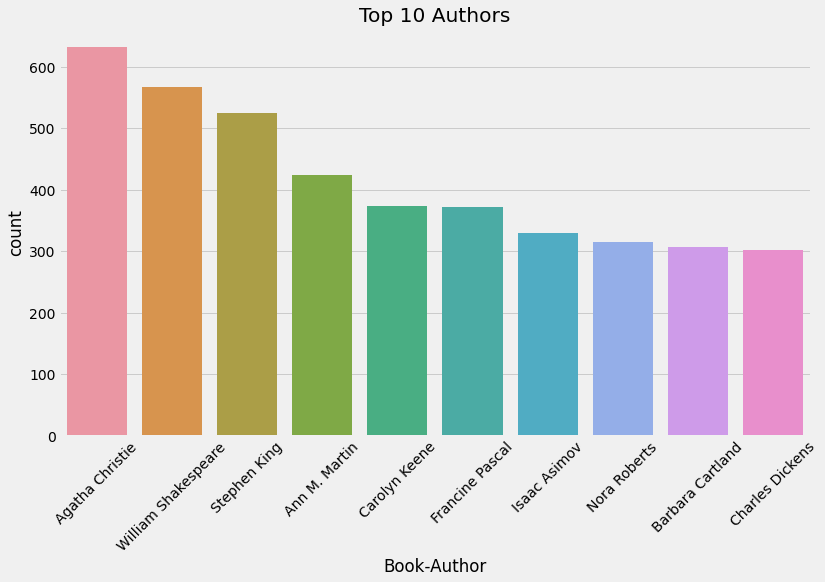

In [109]:
# Using barplot to show top 10 authors

plt.figure(figsize=(12,7))
chart = sns.countplot(x='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Top 10 Authors')

Checking for top 10 publishers who have published maximum number of books

Text(0.5, 1.0, 'Top 10 Publishers')

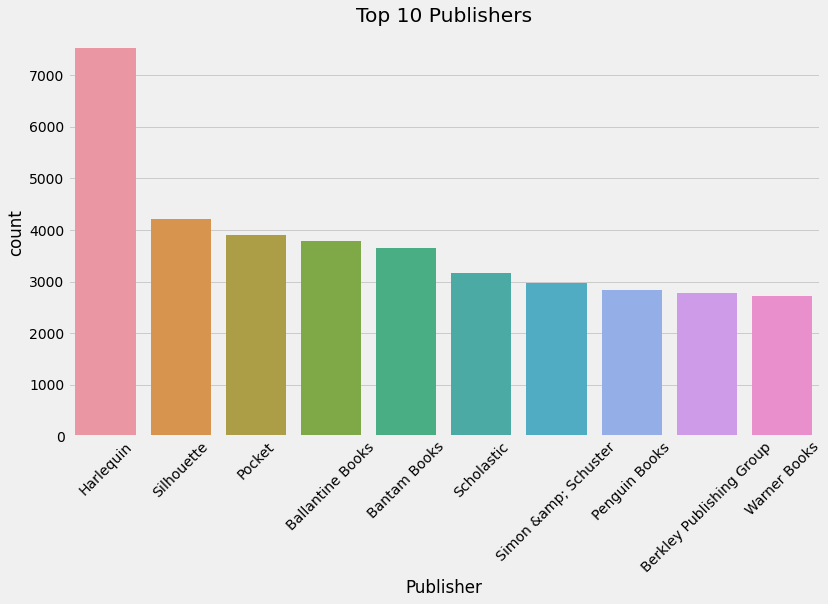

In [110]:
# Using barplot to show top 10 publishers.

plt.figure(figsize=(12,7))
chart = sns.countplot(x='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Top 10 Publishers')

In [111]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [112]:
books=books.dropna(subset=['Image-URL-L'],axis=0)

In [113]:
# Let's print unique values of year-of-publication column

books['Year-Of-Publication'].unique()


array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

* Here Year-of-Publication column contains some name of publishers.
* Some values are int and some values are string.

In [114]:
# Therefore let's Convert all values into string

books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')

In [115]:
# Converting each values from string to integers

books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

print(sorted(books['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


* Years after 2021 are invalid as we are in 2021 and data must be collect before this year.
* The value 0 for Year-of-Publication doesn't make any sense.
* So, we are setting invalid years as NaN.
* Considering extreme value as 2021 just to keeping some margin in case dataset was updated thereafter.

In [116]:
# Here Setting invalid years as NaN

books.loc[(books['Year-Of-Publication'] > 2021) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

In [117]:
# Replacing NaNs with mean value of Year-Of-Publication

books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()), inplace=True)

In [118]:
# Now checking the no. of null values in Books data

books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

let's impute as Null values in Book-Author and Publisher columns.

Null value treatment of Book-Author column

In [119]:
# Exploring 'Book-Author' column

books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [120]:
# Filling Nan of Book-Author with others

books['Book-Author'].fillna('other',inplace=True)

In [121]:
# Let's check for null values again

books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

null value treatment of publisher column

In [122]:
# Exploring 'Publisher' column

books.loc[books['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [123]:
# Filling Nan of Publisher with others

books['Publisher'].fillna('other',inplace=True)

In [124]:
# Let's check for null values again

books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

# Ratings dataset(EDA)

In [125]:
# let's print rows using head method.

ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [126]:
# Extracting ratings of only available books in books dataset

ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape,ratings_new.shape

((1149780, 3), (1031132, 3))

**Many rows having book ISBN not part of books dataset, got dropped off.**

In [127]:
# Checking if ratings from users are eual to no. of users or not

print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031132, 3)
shape of dataset after dropping (1031132, 3)


### Now Let's see the distribution of ratings

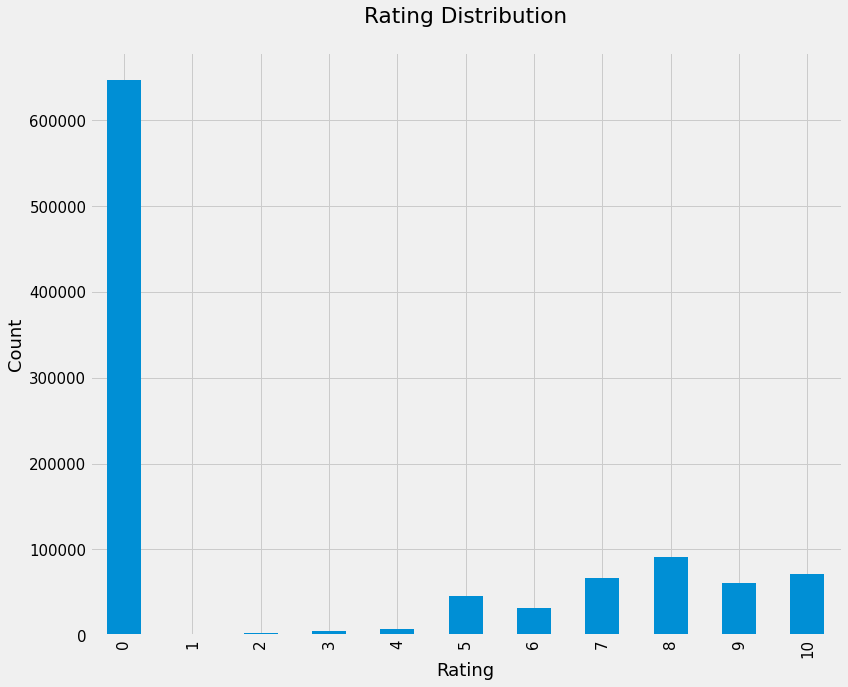

In [128]:
# Following is the distribution plot of ratings

plt.figure(figsize=(12,10))
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [129]:
# Let's segregate implicit and explict ratings datasets

ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

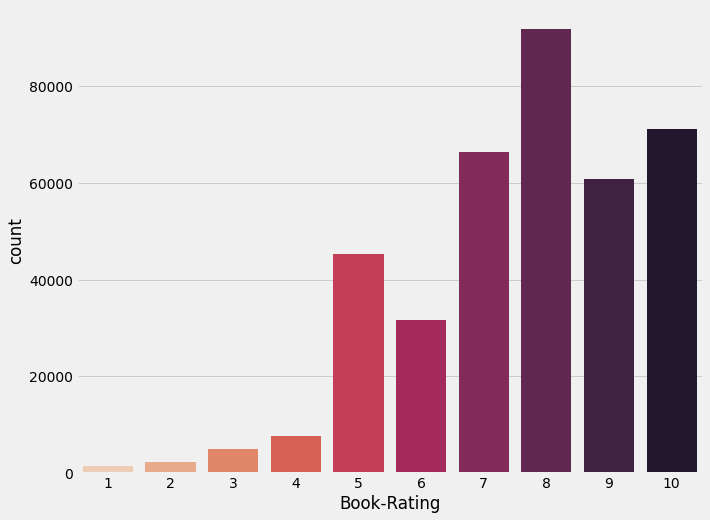

In [130]:
# Distribution of explicit ratings

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

## **Checking for top 5 books which are rated by most number of users**

In [131]:
# Top 5 most rated books

rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


## **Let’s check name of this book and what books are in the top 5.**

In [132]:
# Names of top rated books

most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...


In [133]:
# Let's create column Rating sum

ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,1
3,276729,052165615X,3,1
4,276729,0521795028,6,1
8,276744,038550120X,7,81
16,276747,0060517794,9,30


In [134]:
# Creating column Rating average 

ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')

In [135]:
# Creating column Rating sum

ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Total_No_Of_Users_Rated,Avg_Rating
1,276726,0155061224,5,1,5.000000
3,276729,052165615X,3,1,3.000000
4,276729,0521795028,6,1,6.000000
8,276744,038550120X,7,81,7.580247
16,276747,0060517794,9,30,8.000000


# **Now let's Merge all Datasets**

In [136]:
# Here merging all three datsets together

Final_Dataset=users.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,books,on='ISBN')

In [137]:
# checking shape of Final_Dataset

Final_Dataset.shape

(383841, 14)

In [138]:
# Let's take a look at final_dataset

Final_Dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Total_No_Of_Users_Rated,Avg_Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,8,34.746638,canada,0002005018,5,9,7.666667,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
1,11676,34.746638,nan,0002005018,8,9,7.666667,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,67544,30.000000,canada,0002005018,8,9,7.666667,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,116866,34.746638,,0002005018,9,9,7.666667,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,123629,34.746638,canada,0002005018,9,9,7.666667,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [139]:
# Let's check percentage of null values in each column

missing_values(Final_Dataset)

,index,Missing Values,% of Total Values,Data_type
0,User-ID,0,0.0,int64
1,Age,0,0.0,float64
2,Country,0,0.0,object
3,ISBN,0,0.0,object
4,Book-Rating,0,0.0,int64
5,Total_No_Of_Users_Rated,0,0.0,int64
6,Avg_Rating,0,0.0,float64
7,Book-Title,0,0.0,object
8,Book-Author,0,0.0,object
9,Year-Of-Publication,0,0.0,float64


*   now there is no missing values and no null values present in our data

# Popularity Based Filtering

Book weighted avg formula:

### Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]
where,

* v is the number of votes for the books.
* m is the minimum votes required to be listed in the chart.
* R is the average rating of the book.
* C is the mean vote across the whole report.

In [140]:
# Finding values of C and m.

C= Final_Dataset['Avg_Rating'].mean()
m= Final_Dataset['Total_No_Of_Users_Rated'].quantile(0.80)
Top_Books = Final_Dataset.loc[Final_Dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626702202213541 , m=27.0


(77438, 14)

* Here we used 90th percentile as our cutoff.
* It means, for a book to feature in the charts, it must have more votes than at least 80% of the books in the list.
* There are 77438 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books.

In [141]:
# Weighted_rating function to find popular books.

def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [142]:
# Keeping only one entry of each book

Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('seagreen',as_cmap=True)

In [145]:
# Sorting books based on score calculated above

Top_Books = Top_Books.sort_values('Score', ascending=False)

In [146]:
# Printing the top 5 popular books

Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(5).style.background_gradient(cmap=cm)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.993420
1,"The Return of the King (The Lord of the Rings, Part 3)",77,9.402597,8.941548
2,Harry Potter and the Order of the Phoenix (Book 5),206,9.033981,8.870905
3,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.837006
4,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,8.835062


* The Popularity based recommender provide a general chart of recommended books to all the users.
* They are not sensitive to the interests and tastes of a particular user.
* Harry Potter and the Sorcerer's Stone is rated by maximum no. of users.

# **Collaborative Filtering Recommender**

* Collaborative filtering is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar users.
* There are two categories of collaborative filtering algorithms:
   * Memory based
   * Model based.

Model Based Approach

In [147]:
# Renaming columns of ratings_explicit dataframe

ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [148]:
# Extracting no. of users with atleast 3 ratings

user_ratings_threshold = 3

filter_users = ratings_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = ratings_explicit[ratings_explicit['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 327270


In [149]:
# Extracting top 10% most frequently rated books

book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]

print('Filter: Top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: Top 10% most frequently rated books
Number of records: 160787


### **SVD and NMF algorithms**

* Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction.
* Surprise package provides implementation of these algorithms.

In [150]:
# Installing surprise package

!pip install surprise

     |████████████████████████████████| 11.8 MB 7.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619437 sha256=a366cdb7c2315bec01f2dddc81ce9fe0d35deac31d100da5502bdf6bddb619f8
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [151]:
# Importing modules

from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [152]:
# First take copy of dataset

df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [153]:
# Fitting SVD model with default hyperparameters

model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=5)
pd.DataFrame(cv_results_svd).mean()

test_rmse    1.594257
test_mae     1.231826
fit_time     8.112441
test_time    0.423678
dtype: float64

In [154]:
# Fitting NMF model with default hyperparameters

model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=5)
pd.DataFrame(cv_results_nmf).mean()

test_rmse     2.576903
test_mae      2.202568
fit_time     11.955314
test_time     0.254497
dtype: float64